# Homework 4 - Neural Network Deep Dive

Rob Johnston and Haris Memic

## Baseline runs

### Generic Deep Neural Network

<b>3a) Train and test a generic deep neural network on the data. Record the training time (your choice of approaches) and the accuracy on the test set.</b>

Our first neural network (baseline_nn.py) is a model with three hidden layers of depth 1024, 512, 256 and uses gradient descent as the optimizer. We run it with the following hyper-parameters:
<code>
batch_size: 256, hidden_nodes: 1024, lamb_reg: 0.01, start_learning_rate: 0.01
</code>


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

def plotAccuracy(title, epochs):
    """ Plot training accuracy against the batch number
    """
    plt.figure()
    plt.title(title)
    plt.xlabel("Batch")
    plt.ylabel("Training Accuracy")
    batch = [entry.epoch for entry in epochs.values()]
    acc = [entry.train_accuracy for entry in epochs.values()]
    plt.scatter(batch, acc)
    plt.show()

/Users/rob/anaconda/envs/tensorflow/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Loading:  results/Baseline/baseline_nn/saved_NN_000
Params:  {'start_learning_rate': 0.01, 'hidden_nodes': 1024, 'time': 3.32, 'batch_size': 128, 'lamb_reg': 0.01, 'accuracy': 53.579999999999998}
Time taken to train model: 3.32 mins
Accuracy of model against test data: 53.58


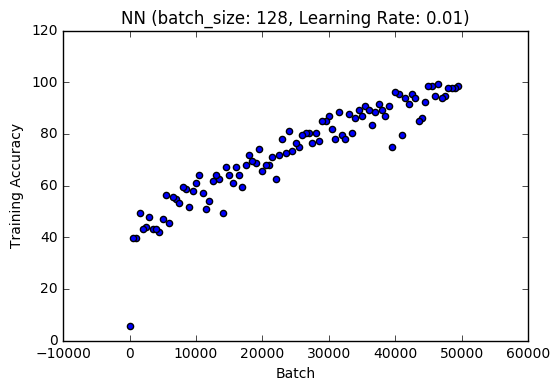

In [2]:
%run '../rob/baseline.py'
%run '../rob/baseline_nn.py'
%run '../rob/result.py'
%run '../rob/results.py'

rs_nn = Results()
rs_nn.load('results/Baseline/baseline_nn')
result_nn = rs_nn.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_nn.params['time']))
print('Accuracy of model against test data: {}'.format(result_nn.params['accuracy']))


plotAccuracy('NN (batch_size: {}, Learning Rate: {})'\
             .format(result_nn.params['batch_size'], result_nn.params['start_learning_rate']), result_nn.epochs)
      

### Generic Convolutional Network

3b) Train and test a generic convolutional network on the data. Record the training time (your choice of approaches) and the accuracy on the test set.

Loading:  results/Baseline/baseline_cnn/saved_CNN_000
Params:  {'depth2': 64, 'patch_size': 5, 'depth1': 32, 'num_hidden': 1024, 'batch_size': 8, 'time': 3.36, 'pooling_strides': [1, 2, 2, 1], 'pooling_ksize': [1, 2, 2, 1], 'accuracy': 67.329999999999998}
Time taken to train model: 3.36 mins
Accuracy of model against test data: 67.33


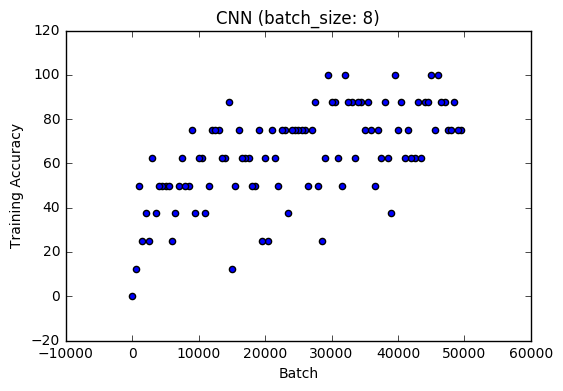

In [3]:
rs_cnn = Results()
rs_cnn.load('results/Baseline/baseline_cnn')
result_cnn = rs_cnn.highest('accuracy')
print('Time taken to train model: {} mins'.format(result_cnn.params['time']))
print('Accuracy of model against test data: {}'.format(result_cnn.params['accuracy']))


plotAccuracy('CNN (batch_size: {})'\
             .format(result_cnn.params['batch_size']), result_cnn.epochs)
      

### Generic Non-Neural Network

3c) Train and test a non-NN algorithm with reasonable performance on the data. I would suggest not SVM for speed reasons. I would suggest avoiding Naïve Bayes and Decision Tree as they generally lack accuracy, but might be worth a try as a supplement. As before, record the training time (your choice of approaches) and the accuracy on the test set.



### Comparison of models

3d) Comment on the differences and perhaps plot the results

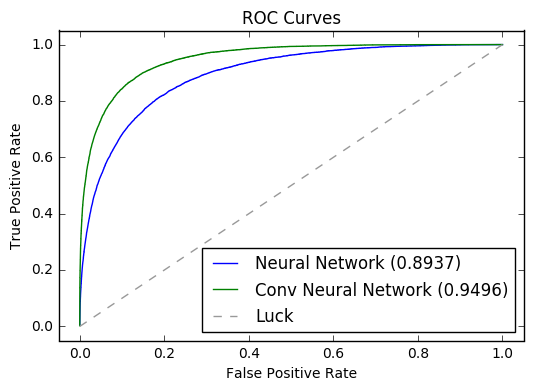

In [10]:
%run '../rob/dataset.py'

# Load the labels
ds = DataSet(use_valid=False)
ds.load(False )
labels = ds.test_labels

# Compute ROC curve and Area Under the Curve

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_nn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Neural Network ({})'.format(roc_auc.round(4)))

fpr, tpr, thresholds = roc_curve(labels.ravel(), result_cnn.test_preds)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='Conv Neural Network ({})'.format(roc_auc.round(4)))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

## Sensitivity to training data

4) Assess the sensitivity of the test set to training data size [10]
* Randomly divide the training data into at least 3 pieces (like cross-validation): A, B, C, ... but do so in a way that preserves the an equal fraction of the 10 categories of images across sets. That is, each set {A,B, etc.} should have the same number of category 1, 2,...10 images within it.
* Train your classifiers in part 3 on each of the following, A, AB, etc. and test on the full test set 
* Plot and comment on how quickly the classifiers learn as compared to 3) using the full data set

## Image Distortion

5) Assess the sensitivity of the test set to distortions [15 pts]
* Create at least one additional test sets by distorting the test set in one manner (not the training data). Possible choices include:
 Adding random noise to the images of different levels
 Shifting the brightness or contrast by different levels
 Flipping or transposing the images
 Randomly settting different fractions of the pixels to an intermediate value
 Obscuring the top k rows of the images to an intermediate value (different levels of k)
These can be done on the fly in testing or separately. TensorFlow includes some options in their tf.images package but similar results could be obtained using GIMP, for example.
* Repeat the baseline run analysis in 3) on the distorted images 5c) Comment on what you learned

## Tuning of hyper-parameters

6) Compare the tuning of hyperparameters across architectural models [25 points]
* Select at least 2 architectural models where an architectural model can include:
1. arrangement of layers in a CNN
2. number of hidden layers
3. number of nodes in hidden layers
4. order of pooling/convolution/etc. in CNN, and/or CNN vs. deep NN

* Compare the architectures in terms of speed & accuracy across  2 hyperparameters such as:  gradient descent optimization methods such as momentum, ADAM, Adagrad, etc.
1. normalization effects
2. regularization
3. dropout
* Plot the results and comment on what you learned. Compare the errors (or accuracy) as a function of epoch.

## Maximisng performance of CNN

7) Maximize your performance with your deep neural network or the CNN [30 pts]
* Tune the parameters
* Discover what works best and walk us through what you tried
* Submit the performance as a %accuracy and as a 10x10 table in the format showing the counts of the test images actual vs. predicted.

## Exploratory Points

8) Exploratory points [optional]
Exploratory points will be given if you go beyond these methods.
ideas for this part that could include different data sets, different types of networks, a significantly deeper analysis into the tuning perhaps, etc. Include a separate section highlighting what you have done that is worthy of exploratory points so we don’t overlook your effort.

### Building a GPU enabled workstation